# Stock Price Prediction Using LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import MinMaxScaler

## Loading DataSet

In [3]:
data = pd.read_csv('GOOG.csv', date_parser=True)


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
1,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
3,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
4,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4117,2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000
4118,2020-12-29,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400
4119,2020-12-30,1762.010010,1765.094971,1725.599976,1739.520020,1739.520020,1306100
4120,2020-12-31,1735.420044,1758.930054,1735.420044,1751.880005,1751.880005,1011900
4121,2021-01-04,1757.540039,1760.650024,1707.849976,1728.239990,1728.239990,1901900


In [6]:
data_training = data[data['Date']< '2019-01-01'].copy()

In [7]:
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
1,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
3,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
4,2004-08-26,52.279045,53.773445,52.134586,53.753517,53.753517,7128620
...,...,...,...,...,...,...,...
3611,2018-12-24,973.900024,1003.539978,970.109985,976.219971,976.219971,1590300
3612,2018-12-26,989.010010,1040.000000,983.000000,1039.459961,1039.459961,2373300
3613,2018-12-27,1017.150024,1043.890015,997.000000,1043.880005,1043.880005,2109800
3614,2018-12-28,1049.619995,1055.560059,1033.099976,1037.079956,1037.079956,1414800


In [8]:
data_test = data[data['Date']>= '2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
3616,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3617,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3618,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3619,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3620,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900
...,...,...,...,...,...,...,...
4117,2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000
4118,2020-12-29,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400
4119,2020-12-30,1762.010010,1765.094971,1725.599976,1739.520020,1739.520020,1306100
4120,2020-12-31,1735.420044,1758.930054,1735.420044,1751.880005,1751.880005,1011900


In [9]:
training_data = data_training.drop(['Date', 'Adj Close'], axis=1)
training_data

,Open,High,Low,Close,Volume
0,50.316402,54.336334,50.062355,53.952770,22942874
1,55.168217,56.528118,54.321388,54.495735,18342897
2,55.412300,55.591629,51.591621,52.239197,15319808
3,52.284027,53.798351,51.746044,52.802086,9232276
4,52.279045,53.773445,52.134586,53.753517,7128620
...,...,...,...,...,...
3611,973.900024,1003.539978,970.109985,976.219971,1590300
3612,989.010010,1040.000000,983.000000,1039.459961,2373300
3613,1017.150024,1043.890015,997.000000,1043.880005,2109800
3614,1049.619995,1055.560059,1033.099976,1037.079956,1414800


## Feature Scaling

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
training_data_scaled = sc.fit_transform(training_data)

In [11]:
training_data_scaled

array([[7.42148227e-04, 2.98909923e-03, 6.47716504e-04, 3.39307537e-03,
        2.77885876e-01],
       [4.71386886e-03, 4.78092896e-03, 4.19769536e-03, 3.83867225e-03,
        2.22151352e-01],
       [4.91367646e-03, 4.01532941e-03, 1.92238659e-03, 1.98679178e-03,
        1.85522815e-01],
       ...,
       [7.92197108e-01, 8.11970141e-01, 7.89936884e-01, 8.15799920e-01,
        2.54669035e-02],
       [8.18777193e-01, 8.21510648e-01, 8.20026849e-01, 8.10219301e-01,
        1.70461017e-02],
       [8.19874096e-01, 8.19172449e-01, 8.12100139e-01, 8.09012935e-01,
        1.79972283e-02]])

## Creating Data With TimeStamps

In [12]:
X_train = []
y_train = []
for i in range(90, training_data_scaled.shape[0]):
    X_train.append(training_data_scaled[i-90:i, 0])
    y_train.append(training_data_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)





In [13]:
X_train.shape

(3526, 90)

In [14]:
y_train.shape

(3526,)

In [15]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [16]:
X_train.shape

(3526, 90, 1)

## Building The LSTM

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [18]:
regressor = Sequential()

regressor.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 60, activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 80, activation='relu', return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))



In [19]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 10, batch_size = 32 )

Epoch 1/10
111/111 [==============================] - 25s 164ms/step - loss: 0.0327
Epoch 2/10
111/111 [==============================] - 19s 172ms/step - loss: 0.0022
Epoch 3/10
111/111 [==============================] - 18s 163ms/step - loss: 0.0016
Epoch 4/10
111/111 [==============================] - 17s 156ms/step - loss: 0.0019
Epoch 5/10
111/111 [==============================] - 17s 153ms/step - loss: 0.0015
Epoch 6/10
111/111 [==============================] - 18s 160ms/step - loss: 0.0015
Epoch 7/10
111/111 [==============================] - 18s 159ms/step - loss: 0.0013
Epoch 8/10
111/111 [==============================] - 17s 157ms/step - loss: 0.0014
Epoch 9/10
111/111 [==============================] - 18s 161ms/step - loss: 0.0014
Epoch 10/10
111/111 [==============================] - 18s 157ms/step - loss: 0.0012


## Prepare Test Dataset

In [20]:
data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
3616,2019-01-02,1016.570007,1052.319946,1015.710022,1045.849976,1045.849976,1532600
3617,2019-01-03,1041.000000,1056.979980,1014.070007,1016.059998,1016.059998,1841100
3618,2019-01-04,1032.589966,1070.839966,1027.417969,1070.709961,1070.709961,2093900
3619,2019-01-07,1071.500000,1074.000000,1054.760010,1068.390015,1068.390015,1981900
3620,2019-01-08,1076.109985,1084.560059,1060.530029,1076.280029,1076.280029,1764900


In [21]:
past_90_days=data_training.tail(90)

In [22]:
df= past_90_days.append(data_test, ignore_index= True )
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-22,1200.000000,1211.839966,1199.000000,1207.329956,1207.329956,887400
1,2018-08-23,1207.140015,1221.280029,1204.239990,1205.380005,1205.380005,992600
2,2018-08-24,1208.819946,1221.650024,1206.359009,1220.650024,1220.650024,946600
3,2018-08-27,1227.599976,1243.089966,1225.715942,1241.819946,1241.819946,1156300
4,2018-08-28,1241.290039,1242.545044,1228.689941,1231.150024,1231.150024,1304000
...,...,...,...,...,...,...,...
591,2020-12-28,1751.635010,1790.728027,1746.334961,1776.089966,1776.089966,1393000
592,2020-12-29,1787.790039,1792.439941,1756.089966,1758.719971,1758.719971,1299400
593,2020-12-30,1762.010010,1765.094971,1725.599976,1739.520020,1739.520020,1306100
594,2020-12-31,1735.420044,1758.930054,1735.420044,1751.880005,1751.880005,1011900


In [23]:
df= df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1200.000000,1211.839966,1199.000000,1207.329956,887400
1,1207.140015,1221.280029,1204.239990,1205.380005,992600
2,1208.819946,1221.650024,1206.359009,1220.650024,946600
3,1227.599976,1243.089966,1225.715942,1241.819946,1156300
4,1241.290039,1242.545044,1228.689941,1231.150024,1304000


In [24]:
inputs= sc.transform(df)
inputs

array([[0.94187904, 0.94927277, 0.95830743, 0.94993893, 0.01065599],
       [0.94772389, 0.95699022, 0.96267506, 0.94833866, 0.01193062],
       [0.94909909, 0.9572927 , 0.9644413 , 0.96087035, 0.01137327],
       ...,
       [1.40194331, 1.40157043, 1.39723777, 1.3866931 , 0.01572906],
       [1.38017663, 1.39653048, 1.40542297, 1.39683661, 0.01216446],
       [1.39828417, 1.39793659, 1.38244283, 1.37743588, 0.02294793]])

In [25]:
X_test = []
y_test = []
for i in range(90, inputs.shape[0]):
    X_test.append(inputs[i-90:i, 0])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)

In [26]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [27]:
y_pred = regressor.predict(X_test) 

In [28]:
y_pred.shape

(506, 1)

In [29]:
sc.scale_
##sc.scale_[0]

array([8.18605127e-04, 8.17521128e-04, 8.33517573e-04, 8.20673293e-04,
       1.21162615e-08])

In [30]:
scale=1/sc.scale_[0]
scale

1221.590199

In [31]:
y_pred= y_pred*scale
y_test= y_test*scale
y_pred

array([[ 964.10944],
       [ 962.0528 ],
       [ 960.1042 ],
       [ 958.3186 ],
       [ 956.79834],
       [ 955.6443 ],
       [ 954.9377 ],
       [ 954.6969 ],
       [ 954.8902 ],
       [ 955.42883],
       [ 956.2141 ],
       [ 957.20935],
       [ 958.39685],
       [ 959.80005],
       [ 961.4192 ],
       [ 963.21625],
       [ 965.13586],
       [ 967.1353 ],
       [ 969.16797],
       [ 971.17645],
       [ 973.09973],
       [ 974.95166],
       [ 976.7857 ],
       [ 978.6566 ],
       [ 980.6262 ],
       [ 982.76587],
       [ 985.05817],
       [ 987.4143 ],
       [ 989.7498 ],
       [ 992.0126 ],
       [ 994.204  ],
       [ 996.3291 ],
       [ 998.41376],
       [1000.4454 ],
       [1002.4159 ],
       [1004.3011 ],
       [1006.0565 ],
       [1007.6676 ],
       [1009.1163 ],
       [1010.3913 ],
       [1011.49756],
       [1012.4735 ],
       [1013.40497],
       [1014.3826 ],
       [1015.499  ],
       [1016.80914],
       [1018.2783 ],
       [1019.

In [32]:
y_test

array([ 967.160206,  991.590199,  983.180165, 1022.090199, 1026.700184,
       1032.240223, 1018.250233, 1013.770253,  997.510243, 1000.760243,
       1030.590199, 1030.06017 , 1050.590199, 1038.590199, 1027.940175,
       1027.070179, 1035.590199, 1030.700184, 1023.270253, 1019.020253,
       1053.590199, 1062.990223, 1063.250233, 1075.430165, 1090.160145,
       1054.750233, 1037.590199, 1047.54015 , 1057.390248, 1075.580189,
       1068.640248, 1080.670155, 1060.590199, 1070.580189, 1061.430165,
       1051.490223, 1066.590199, 1056.340199, 1057.54015 , 1061.890248,
       1075.490223, 1097.580189, 1100.650258, 1113.080189, 1106.31017 ,
       1077.320179, 1095.04015 , 1128.850209, 1151.235219, 1145.100209,
       1143.970204, 1133.890248, 1139.400258, 1147.940175, 1166.590199,
       1176.910145, 1147.520253, 1149.120228, 1136.090199, 1122.130238,
       1125.490223, 1134.690175, 1145.910145, 1158.070179, 1156.53014 ,
       1165.580189, 1158.480214, 1146.590199, 1151.270253, 1154.

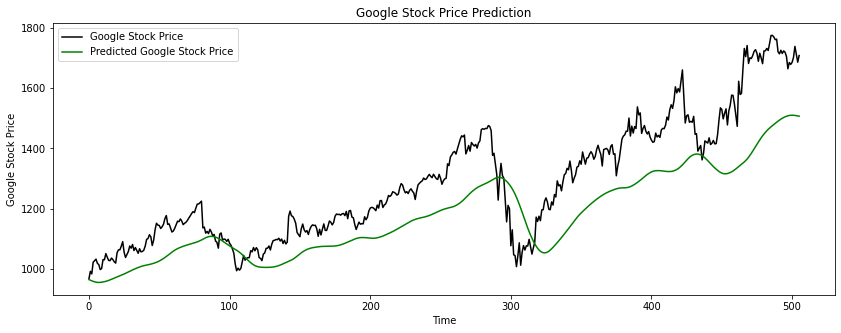

In [33]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'black', label = 'Google Stock Price')
plt.plot(y_pred, color = 'green', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()